In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

def plot_cols(column_list, ylabel=''):
    """Plot columns from df. Columns to plot must be in
    column_list."""
    
    n = len(column_list)

    fig, ax = plt.subplots(n, figsize=(10,3*n), tight_layout=True, sharex=True)

    for i, col in enumerate(column_list):
        ax[i].plot(df.index, df[col], label=col)
        ax[i].legend(loc='upper right')
        ax[i].set(ylabel=ylabel)
        
    return fig, ax

In [3]:
infiles = ["../../raw_data/Calhoun/R1H1/r1h1_gas_SM_ST.csv"]  
# Lists of all dataframes
df_list = []

for infile in tqdm(infiles):
    df = pd.read_csv(infile, na_values=['NAN', -9999],  parse_dates=[0], 
                     index_col=0, skiprows=[1]) # skiprows=[1] skips the 1th row (0-indexed)
    df_list.append(df)
    
prism_path = "../../raw_data/Calhoun/R1C1_PRISM.csv"
ppt = pd.read_csv(prism_path, na_values=['NAN',-9999,-99999], skiprows=11, 
                  parse_dates=[0], index_col=0, names=['PRISM_precip.mm']) 
ppt['PRISM_precip.mm'] = pd.to_numeric(ppt['PRISM_precip.mm'])

In [4]:


#columns=['Record', 'Battavg', 'PTemp_C_Avg', 'CO2_50cm.ppm', 'CO2_150cm.ppm', 'T108_C_0cm_Avg',
#         'Temp_C_box_Avg','SoilMoisture_50cm.m3m3','BulkEC_50cm.dS/m','T_TDR50cm_Avg','P_50cm_Avg', 
 #        'PA_50cm_Avg', 'VR_50cm_Avg', 'T_O2_50cm_degC_Avg', 'T_O2_150cm_degC_Avg', 
  #       'BattV_Std', 'PTemp_C_Std','CO2_50cm_std.ppm','CO2_150cm_std.ppm', 'T108_C_0cm_std','Temp_C_box_std',
  #       'SoilMoisture_50cm_std.m3m3','BulkEC_50cm_std.dS/m','T_TDR50cm_std','P_50cm_std', 'PA_50cm_std',
  #       'VR_50cm_std', 'T_O2_50cm_degC_std', 'T_O2_150cm_degC_std', 'O2_50cm.percent.0-100', 'O2_150cm.percent.0-100',
  #       'T_TDR25cm_Std', 'T_TDR25cm_Avg', 'VWC_25cm_Avg', 'VWC_25cm_Std', 'EC_25cm_Avg', 'EC_25cm_Std',
  #       'P_25cm_Std', 'P_25cm_Avg', 'PA_25cm_Avg', 'PA_25cm_Std', 'VR_25cm_Std', 'VR_25cm_Avg'
  #       'pct_O2_50cm_Std', 'pct_O2_150cm_Std']

# Concatenate all individual files to a single dataframe
df = pd.concat(df_list)
#df.columns = columns

# Resample everything to hourly averages since certain 
# sensors are measured on different schedules
df.sort_index(inplace=True) # Sort first
df = df.resample('1H').mean()
df
# Add on up-sampled PRISM data
# (resample daily to hourly, using the nearest value, then
#  add on as new column to df)
ppt = ppt.drop(pd.date_range('2015-07-31', '2016-03-30'), errors='ignore')
#ppt = ppt.drop(pd.date_range('2018-10-02', '2019-06-24'), errors='ignore')
hourly_ppt = ppt.resample('1H').nearest()
df.loc[hourly_ppt.index, 'PRISM_precip.mm'] = hourly_ppt['PRISM_precip.mm']

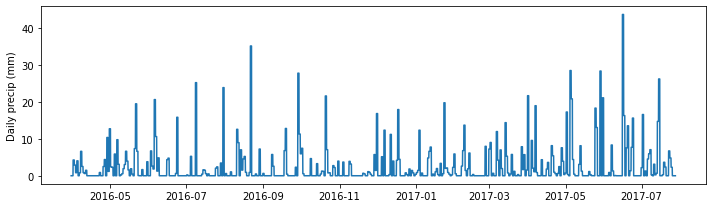

In [5]:
# Plot precip data
fig, ax = plt.subplots(figsize=(10,3), tight_layout=True)

ax.plot(df.index, df['PRISM_precip.mm'])
ax.set(ylabel='Daily precip (mm)');

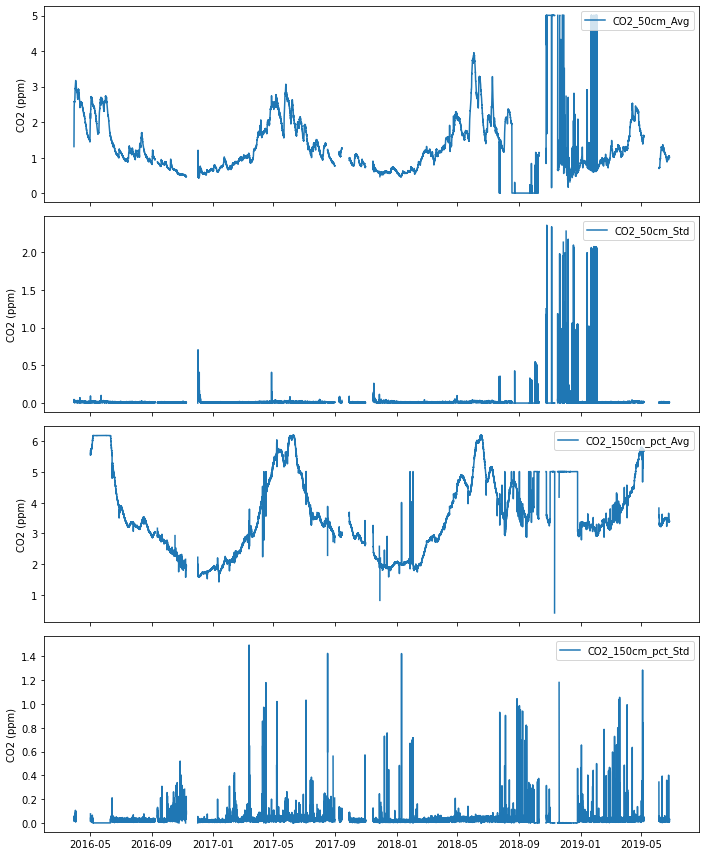

In [6]:
# Plot CO2 data
co2_cols = [col for col in df.columns if 'CO2' in col]
plot_cols(co2_cols, ylabel='CO2 (ppm)');

In [7]:
df=pd.concat([df2,df3], sort=False)
#df.columns=['ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'ApogeeTemp_60(2)cm.deg.C', 'O2_10cm.percent.0-100','O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'O2_60(2)cm.percent.0-100', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'CO2_60(2)cm.ppm', 'WaterPotential_10cm.kPa','WaterPotential_30cm.kPa', 'DecagonMPS6Temp_10cm.deg.C','DecagonMPS6Temp_30cm.deg.C', 'SoilMoisture_10cm.m3m3', 'SoilMoisture_30cm.m3m3', 'SoilMoisture_60cm.m3m3', 'SoilMoisture_60(2)cm.m3m3', 'BulkEC_10cm.dS/m', 'BulkEC_30cm.dS/m', 'BulkEC_60cm.dS/m', 'BulkEC_60(2)cm.dS/m', 'Decagon5TETemp_10cm.deg.C','Decagon5TETemp_30cm.deg.C', 'Decagon5TETemp_60cm.deg.C', 'Decagon5TETemp_60(2)cm.deg.C','ReductionPotential_10cm.mV', 'ReductionPotential_5cm.mV', 'ReductionPotential_30cm.mV', 'ReductionPotential_60cm.mV' ]
df

,Depth (m),O2_pct,CO2_pct,GC_N2O_ppm,GC_CH4_ppm,GC_CO2_pct,BattV_Avg,PTemp_C_Avg,CO2_50cm_Avg,T108_C_0cm_Avg,Temp_C_box_Avg,VWC_50cm_Avg,EC_50cm_Avg,T_TDR50cm_Avg,P_50cm_Avg,PA_50cm_Avg,VR_50cm_Avg,T_O2_50cm_degC_Avg,T_O2_150cm_degC_Avg,BattV_Std,PTemp_C_Std,CO2_50cm_Std,T108_C_0cm_Std,Temp_C_box_Std,VWC_50cm_Std,EC_50cm_Std,T_TDR50cm_Std,P_50cm_Std,PA_50cm_Std,VR_50cm_Std,T_O2_50cm_degC_Std,T_O2_150cm_degC_Std,pct_O2_50cm_Avg,pct_O2_150cm_Avg,CO2_150cm_pct_Avg,T_TDR25cm_Std,T_TDR25cm_Avg,VWC_25cm_Std,EC_25cm_Std,P_25cm_Std,PA_25cm_Std,VR_25cm_Std,VWC_25cm_Avg,EC_25cm_Avg,P_25cm_Avg,PA_25cm_Avg,VR_25cm_Avg,pct_O2_50cm_Std,pct_O2_150cm_Std,CO2_150cm_pct_Std
2015-07-31 00:00:00,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31 00:00:00,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31 00:00:00,3,14.8,NaN,0.68391,0.22855,3.87964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31 00:00:00,5,12.8,NaN,0.801703,0.145884,5.54134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-20 00:00:00,0,19.1,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-26 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.33,28.24,1.002,23.29,28.39,0.21,0.017,20.77,11.16,1.519,1.021,22.87,19.36,0.021,0.040,0.013,0.042,0.101,0.0,0.0,0.015,0.000,0.000,0.0,0.007,0.0,17.47,16.04,3.384,0.009,21.54,0.0,0.0,0.000,0.000,0.0,0.062,0.003,4.286,1.254,1.003,0.0,0.0,0.025
2019-06-26 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,12.28,28.42,1.004,23.37,28.55,0.21,0.017,20.77,11.15,1.519,1.021,22.87,19.36,0.005,0.040,0.005,0.007,0.082,0.0,0.0,0.009,0.017,0.001,0.0,0.000,0.0,17.47,16.04,3.401,0.015,21.56,0.0,0.0,0.013,0.001,0.0,0.062,0.003,4.278,1.253,1.003,0.0,0.0,0.040
2019-06-26 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,12.28,28.44,0.999,23.35,28.39,0.21,0.017,20.77,11.13,1.518,1.021,22.89,19.36,0.018,0.016,0.016,0.014,0.034,0.0,0.0,0.008,0.001,0.000,0.0,0.014,0.0,17.47,16.04,3.410,0.024,21.58,0.0,0.0,0.001,0.000,0.0,0.062,0.003,4.259,1.252,1.003,0.0,0.0,0.036
2019-06-26 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,12.25,28.27,1.006,23.37,28.04,0.21,0.017,20.79,11.13,1.518,1.021,22.93,19.36,0.014,0.079,0.004,0.007,0.120,0.0,0.0,0.006,0.000,0.000,0.0,0.000,0.0,17.47,16.04,3.374,0.019,21.62,0.0,0.0,0.002,0.000,0.0,0.062,0.003,4.261,1.252,1.003,0.0,0.0,0.024


In [8]:
#Corrections to whole DataFrame
#df=df.fillna(value=0)
df.mask(df=='FL', inplace=True)
df=df.astype(float)


C:\Users\marcb\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


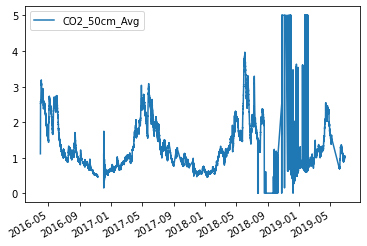

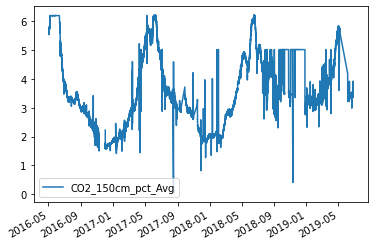

In [9]:
plt.show()
#df.plot(use_index=True, y='CO2_pct')
df.plot(use_index=True, y='CO2_50cm_Avg')
df.plot(use_index=True, y='CO2_150cm_pct_Avg')


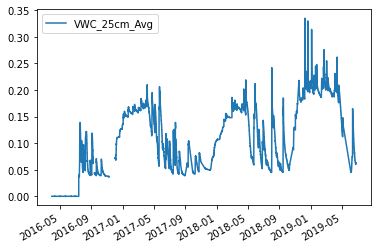

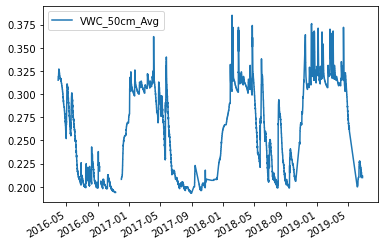

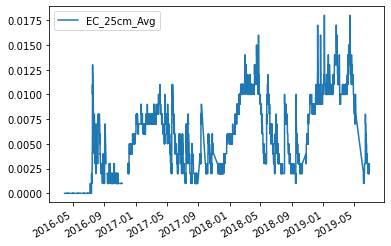

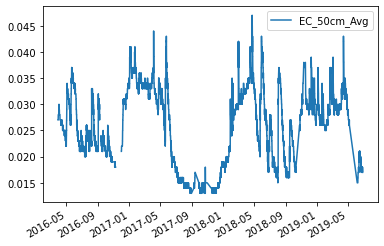

In [10]:
#Plot CO2 data


plt.show()
df.plot(use_index=True, y='VWC_25cm_Avg')
df.plot(use_index=True, y='VWC_50cm_Avg')

df.plot(use_index=True, y='EC_25cm_Avg')
df.plot(use_index=True, y='EC_50cm_Avg')







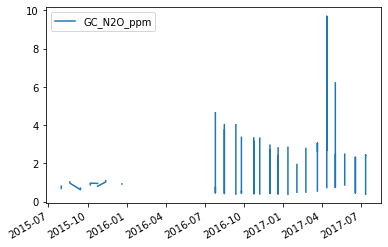

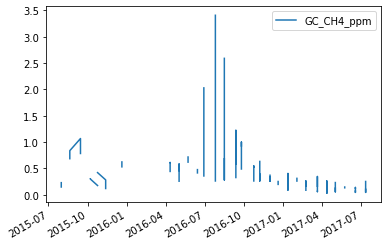

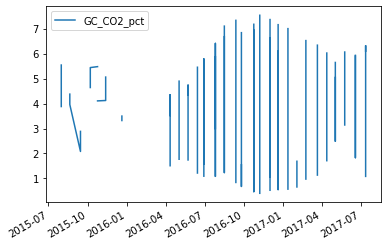

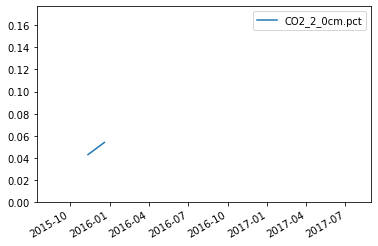

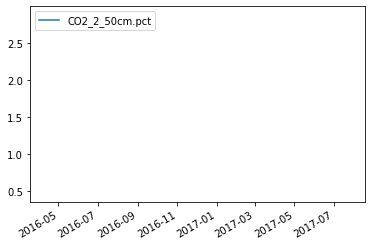

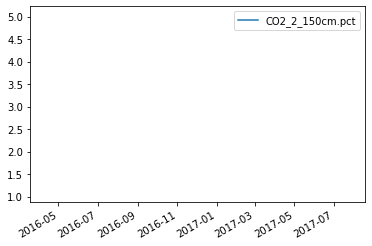

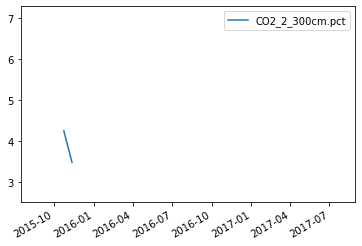

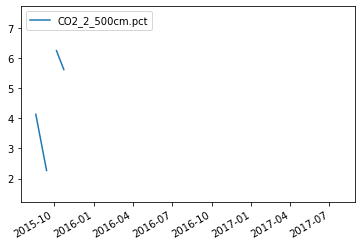

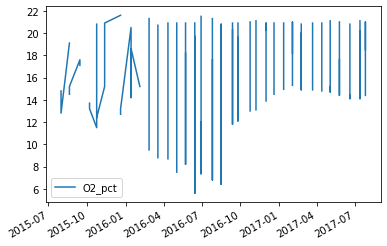

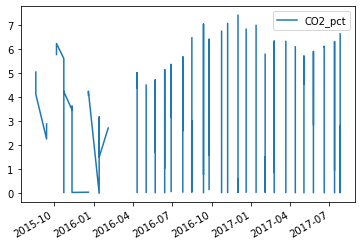

In [11]:

df['CO2_2_0cm.pct']=np.where(df['Depth (m)'] == 0, df['CO2_pct'], np.nan)
df['CO2_2_50cm.pct']=np.where(df['Depth (m)'] == .5, df['CO2_pct'], np.nan)
df['CO2_2_150cm.pct']=np.where(df['Depth (m)'] == 1.5, df['CO2_pct'], np.nan)
df['CO2_2_300cm.pct']=np.where(df['Depth (m)'] == 3, df['CO2_pct'], np.nan)
df['CO2_2_500cm.pct']=np.where(df['Depth (m)'] == 5, df['CO2_pct'], np.nan)



df

plt.show()
df.plot(use_index=True, y='GC_N2O_ppm')
df.plot(use_index=True, y='GC_CH4_ppm')
df.plot(use_index=True, y='GC_CO2_pct')
df.plot(use_index=True, y='CO2_2_0cm.pct')
df.plot(use_index=True, y='CO2_2_50cm.pct')
df.plot(use_index=True, y='CO2_2_150cm.pct')
df.plot(use_index=True, y='CO2_2_300cm.pct')
df.plot(use_index=True, y='CO2_2_500cm.pct')


df.plot(use_index=True, y='O2_pct')
df.plot(use_index=True, y='CO2_pct')






In [12]:
#plt.show()
#df.plot(use_index=True, y='WaterPotential_10cm.kPa')
#df.plot(use_index=True, y='WaterPotential_30cm.kPa')

KeyError: 'WaterPotential_10cm.kPa'

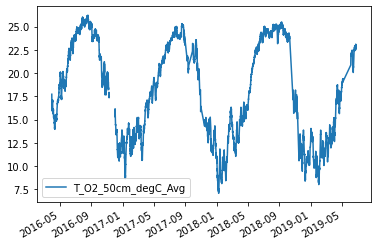

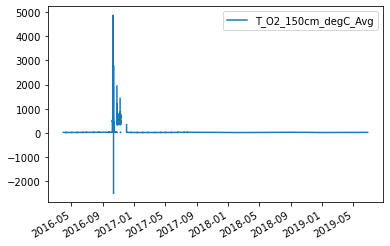

In [13]:
plt.show()
df.plot(use_index=True, y='T_O2_50cm_degC_Avg')
df.plot(use_index=True, y='T_O2_150cm_degC_Avg')


In [14]:
output=df.copy()
today = dt.date.today()
outfile = 'CO2 Data/processed_data/Calhoun/R1H1_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.EST')

In [ ]:
output